# Aim
In our study (Study 1), we could not find any statistical significances.

For further analysis, we examined the data cleaning.

# Points
In Study 1, participants who had spent time less than 1.5 interquatile range (IQR) below the lower quartile (Q1) or more than 1.5 IQR above the upper quartile (Q3) on completing the questionnaire were excluded.

First, in order to assess whether the exclusion was appropriate or not, we examined:

- Distribution of time needed to complete the questionnaire
- The excluded data

Then, we examined another way to excluded outliers, in which most frequent responses were excluded as the outliers.

# Load data

In [1]:
import pandas as pd

In [2]:
# Load the raw data
df = pd.read_excel('../../RawData/RawData_230519to230522.xlsx', sheet_name=1, header=0, index_col=0)

In [3]:
# Rename variables
var_df = pd.read_excel('../../Materials/variables.xlsx', sheet_name=1, header=0, index_col=None)
var_dict = dict(zip(var_df['name1'], var_df['name2']))
df = df.rename(columns=var_dict)

In [4]:
df.head()

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
1,2023/05/19-12:49:32,2023/05/19-12:51:56,00:02:24,2,50,13,1,6,1,2,...,3,回答なし,5,回答なし,7,回答なし,7,回答なし,COMP,6
2,2023/05/19-12:49:10,2023/05/19-12:52:07,00:02:57,1,40,7,1,5,2,2,...,3,回答なし,3,回答なし,3,回答なし,4,回答なし,COMP,5
3,2023/05/19-12:49:28,2023/05/19-12:55:05,00:05:37,2,40,23,1,2,2,1,...,2,仕事を抱え込む,7,チェックが細かい,7,基本受け身,2,話が下手,COMP,2
4,2023/05/19-12:55:11,2023/05/19-12:57:07,00:01:56,1,48,39,1,1,3,2,...,4,回答なし,4,回答なし,4,回答なし,4,回答なし,COMP,1
5,2023/05/19-12:54:24,2023/05/19-12:57:31,00:03:07,1,46,18,1,2,3,1,...,4,ない,4,ない,3,なし,4,なし,COMP,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 182
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   start                        182 non-null    object
 1   end                          182 non-null    object
 2   rt                           182 non-null    object
 3   self_sex                     182 non-null    int64 
 4   self_age                     182 non-null    int64 
 5   residence                    182 non-null    int64 
 6   participation                182 non-null    int64 
 7   IOS_score                    182 non-null    int64 
 8   target_likedislike           182 non-null    int64 
 9   target_sex                   182 non-null    int64 
 10  target_age                   182 non-null    int64 
 11  relationship                 182 non-null    object
 12  self_tolerance_score         182 non-null    int64 
 13  self_tolerance_text          182 non-nul

# Time to complete the questionnaire

In [6]:
# Convert Datatimeindex to a numeric format
rt = pd.to_datetime(df.end) - pd.to_datetime(df.start)
df['rt'] = pd.to_timedelta(rt).dt.total_seconds()

In [7]:
df['rt'].describe()

count     182.000000
mean      322.142857
std       331.931217
min        60.000000
25%       153.250000
50%       226.500000
75%       368.000000
max      3529.000000
Name: rt, dtype: float64

<Axes: >

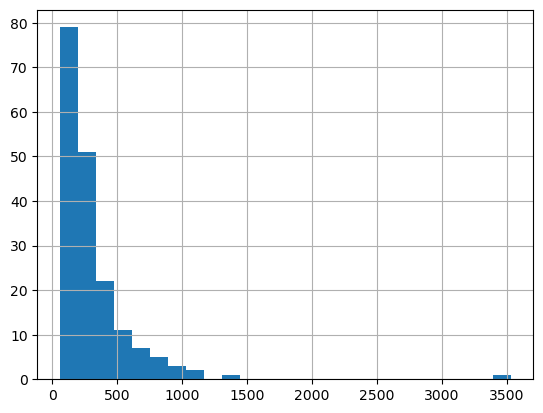

In [8]:
df['rt'].hist(bins=25)

In [9]:
# the lowest RTs
df.sort_values('rt').head(10)

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
140,2023/05/19-16:37:24,2023/05/19-16:38:24,60.0,2,25,22,1,3,5,3,...,5,わからない,5,わからない,6,わからない,2,わからない,COMP,10
155,2023/05/19-18:12:55,2023/05/19-18:14:00,65.0,1,40,13,1,3,4,1,...,4,なはさ,4,なし,3,なし,3,なはさ,COMP,10
33,2023/05/19-13:13:52,2023/05/19-13:15:01,69.0,2,37,13,1,1,3,4,...,4,ない,4,ない,4,ない,4,ない,COMP,1
148,2023/05/19-17:09:18,2023/05/19-17:10:32,74.0,2,32,40,1,7,4,2,...,4,わからない,4,わからない,3,わからない,4,わからない,COMP,14
154,2023/05/19-18:11:40,2023/05/19-18:12:58,78.0,2,48,27,1,5,6,4,...,3,ない,3,not,4,ない,4,ない,COMP,12
159,2023/05/19-18:21:28,2023/05/19-18:22:49,81.0,1,31,7,1,3,4,4,...,3,なし,5,なし,3,なし,5,なし,COMP,10
138,2023/05/19-16:28:09,2023/05/19-16:29:33,84.0,1,37,13,1,7,6,1,...,3,なし,4,なし,5,なし,4,なし,COMP,14
162,2023/05/19-18:26:18,2023/05/19-18:27:45,87.0,2,31,23,1,7,6,4,...,7,なし,7,なし,7,なし,7,なし,COMP,14
77,2023/05/19-13:36:58,2023/05/19-13:38:28,90.0,2,48,17,1,5,4,2,...,4,回答なし,4,回答なし,4,回答なし,4,回答なし,COMP,12


In [10]:
# the longest RTs
df.sort_values('rt', ascending=False).head(10)

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
172,2023/05/19-18:32:52,2023/05/19-19:31:41,3529.0,2,32,27,1,5,4,1,...,5,回答なし,7,何事も考えすぎる,5,回答なし,4,人と話すのはあまり苦手,COMP,12
145,2023/05/19-16:34:02,2023/05/19-16:58:09,1447.0,2,59,11,1,4,4,1,...,5,最後まで諦めずにやり切る責任感がある,6,何事にも上手く対応するために慎重にやっている,2,何事にも前向きに対応することが好かれる要因,6,多くの仲間がいて一緒に行動,COMP,11
96,2023/05/19-13:49:26,2023/05/19-14:07:48,1102.0,1,49,29,1,7,1,1,...,1,良い,6,良い,5,良い,5,良い,COMP,7
147,2023/05/19-16:42:58,2023/05/19-17:01:06,1088.0,1,45,26,1,5,4,2,...,5,なし,5,なし,4,なし,4,なし,COMP,12
111,2023/05/19-15:01:13,2023/05/19-15:18:11,1018.0,2,41,11,1,6,4,2,...,3,回答なし,6,回答なし,6,回答なし,2,回答なし,COMP,13
43,2023/05/19-13:02:30,2023/05/19-13:19:05,995.0,2,53,7,1,1,3,1,...,5,刹那主義で、人を養うスキルがない,3,大事な判断を間違う,2,行動力がある,5,老若男女誰とでもコミュニケーションが出来る,COMP,1
98,2023/05/19-14:02:09,2023/05/19-14:18:22,973.0,2,48,23,1,7,1,2,...,2,仕事ぶり,6,回答なし,4,回答なし,3,家族でいることが多いから。,COMP,7
81,2023/05/19-13:28:14,2023/05/19-13:43:05,891.0,2,52,32,1,3,2,2,...,4,回答なし,4,時々頼んだことが実行できない時に平気な感じでとぼけられて島内,3,回答なし,6,誰とでも気さくに話しかけられる,COMP,3
83,2023/05/19-13:30:00,2023/05/19-13:43:42,822.0,1,58,14,1,3,1,2,...,2,回答なし,3,嘘をつかないので教えてくれたが、知らない男性とLINE交換してしまったことがあると聞いたから,2,1日3時間と決めたことを守っている。,6,配信アプリで配信することは社交的である,COMP,3


## Exclude outliers based on the time

In [11]:
# IQR
q1 = df['rt'].quantile(0.25)
q3 = df['rt'].quantile(0.75)
iqr = q3 - q1

# Participants who spent time less than 1.5 IQR below the lower quatile (Q1)
lower_limit = q1 - 1.5 * iqr
df_lowerIQR = df[df['rt'] <= lower_limit]

# Participants who spent time more than 1.5 IQR above the upper  quatile (Q3)
upper_limit = q3 + 1.5 * iqr
df_upperIQR = df[df['rt'] >= upper_limit]


In [12]:
# Outliers: below the Q1
df_lowerIQR

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,


In [13]:
# Outlies: above the Q3
df_upperIQR

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
22,2023/05/19-12:56:46,2023/05/19-13:09:04,738.0,2,35,13,1,6,3,1,...,1,仕事を絶対休まない,7,何かを買うときに入念に調べてから買う,6,自分から話しかけることはほぼしない,1,人と会うことがない,COMP,6
42,2023/05/19-13:06:19,2023/05/19-13:18:47,748.0,1,55,16,1,6,1,2,...,5,子供なので何とも言えない。,4,どちらでもないと思う。,2,いろいろな事を積極的にするので。,7,知らない人にも平気で話せる。,COMP,6
43,2023/05/19-13:02:30,2023/05/19-13:19:05,995.0,2,53,7,1,1,3,1,...,5,刹那主義で、人を養うスキルがない,3,大事な判断を間違う,2,行動力がある,5,老若男女誰とでもコミュニケーションが出来る,COMP,1
54,2023/05/19-13:08:59,2023/05/19-13:22:02,783.0,2,50,4,1,2,3,2,...,4,回答なし,3,ノリが良い方だと思うが、たまに会う時などはいつも愚痴をこぼしている事があるのでとても慎重とは...,4,回答なし,6,こ～ぷ委員の委員長をしたり、料理教室に参加したり、手芸教室に参加したり、色々な人とかかわって...,COMP,2
81,2023/05/19-13:28:14,2023/05/19-13:43:05,891.0,2,52,32,1,3,2,2,...,4,回答なし,4,時々頼んだことが実行できない時に平気な感じでとぼけられて島内,3,回答なし,6,誰とでも気さくに話しかけられる,COMP,3
83,2023/05/19-13:30:00,2023/05/19-13:43:42,822.0,1,58,14,1,3,1,2,...,2,回答なし,3,嘘をつかないので教えてくれたが、知らない男性とLINE交換してしまったことがあると聞いたから,2,1日3時間と決めたことを守っている。,6,配信アプリで配信することは社交的である,COMP,3
88,2023/05/19-13:38:54,2023/05/19-13:51:42,768.0,1,56,13,1,1,6,2,...,7,回答なし,1,回答なし,5,回答なし,7,社交性はある,COMP,8
96,2023/05/19-13:49:26,2023/05/19-14:07:48,1102.0,1,49,29,1,7,1,1,...,1,良い,6,良い,5,良い,5,良い,COMP,7
98,2023/05/19-14:02:09,2023/05/19-14:18:22,973.0,2,48,23,1,7,1,2,...,2,仕事ぶり,6,回答なし,4,回答なし,3,家族でいることが多いから。,COMP,7


## Issues
- Although articipants who took short time (< Q1) to complete the questionnaire seem to have provided many unfavorable resonsese (e.g. "わからない", "ない"), those responses were not excluded.
- While particiapnats who took long time (> Q3) seem to have provided meaningful responses, those were excluded.
- These unexpected inclusion and exclusion appear to come from the distribution of the reaction time (right-skewed)

# A solusion
We expected that the most frequent responses are meaningless, e.g., "回答なし" or "わからない". So, we tried to excluded those responses based on their apperance frequency.
- step1: Examines the most frequent responses
- step2: Replaces the frequent responses with a whitespace
- step3: Excludes participants whose responses are all whitespaces

In [14]:
textvar_name = ['self_tolerance_text', 'self_pleasantness_text', 'self_responsibility_text',
		'self_carefulness_text', 'self_activeness_text', 'self_sociability_text',
		'target_tolerance_text', 'target_pleasantness_text', 'target_responsibility_text',
		'target_carefulness_text', 'target_activeness_text', 'target_sociability_text',
		]

## Step1: Examines the most frequent responses

In [15]:
s_concat = pd.Series(dtype=object)
for col in textvar_name:
	s_concat = pd.concat([s_concat, df.loc[:, col]], ignore_index=True)

In [16]:
s_concat.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2184 entries, 0 to 2183
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
2184 non-null   object
dtypes: object(1)
memory usage: 17.2+ KB


In [17]:
s_concat

0                                            回答なし
1                                            回答なし
2                                        怒ったことがない
3                                            回答なし
4                                              ない
                          ...                    
2179                                        わからない
2180                                           なし
2181                                           なし
2182                                         回答なし
2183    人込みは嫌いと言いながら出掛けたがる、近所の人や会社の人に積極的に挨拶して会話する
Length: 2184, dtype: object

In [18]:
s_concat.value_counts().head(30)

回答なし           1063
なし              257
ない               58
わからない            50
特になし             26
なんとなく            23
無し               23
回答無し             19
特に無し             17
特にありません。         17
不明               12
楽しい              12
特に無い             12
意味不明              9
良い                6
ないですね             5
特無し               3
かし                3
無い                3
普通                3
自分勝手              2
回答なし              2
エピソードなし           2
行動力がある            2
外面がいい             2
どちらでもないと思う。       2
何事も慎重             2
石橋を叩きすぎる          2
分からない             2
熟慮するため            2
Name: count, dtype: int64

In [19]:
# rep_list = list(s_concat.value_counts()[s_concat.value_counts() > 10].index) # 頻出回数 > 10
rep_list = list(s_concat.value_counts()[0:20].index) # 頻出上位20語
print(rep_list)

['回答なし', 'なし', 'ない', 'わからない', '特になし', 'なんとなく', '無し', '回答無し', '特に無し', '特にありません。', '不明', '楽しい', '特に無い', '意味不明', '良い', 'ないですね', '特無し', 'かし', '無い', '普通']


## Steps 2 and 3: Replaces the responses and excludes the records

In [20]:
len(df)

182

In [21]:
df2 = df.replace(rep_list, '').drop_duplicates(subset=textvar_name, keep=False)

In [22]:
len(df2)

88

In [23]:
df2.groupby('IOS_score').size()

IOS_score
1     7
2    16
3    16
4     8
5    13
6    11
7    17
dtype: int64

## Check the remaining records

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 2 to 182
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   start                        88 non-null     object 
 1   end                          88 non-null     object 
 2   rt                           88 non-null     float64
 3   self_sex                     88 non-null     int64  
 4   self_age                     88 non-null     int64  
 5   residence                    88 non-null     int64  
 6   participation                88 non-null     int64  
 7   IOS_score                    88 non-null     int64  
 8   target_likedislike           88 non-null     int64  
 9   target_sex                   88 non-null     int64  
 10  target_age                   88 non-null     int64  
 11  relationship                 88 non-null     object 
 12  self_tolerance_score         88 non-null     int64  
 13  self_tolerance_text       

In [25]:
df2.loc[:, textvar_name].head(10)

,self_tolerance_text,self_pleasantness_text,self_responsibility_text,self_carefulness_text,self_activeness_text,self_sociability_text,target_tolerance_text,target_pleasantness_text,target_responsibility_text,target_carefulness_text,target_activeness_text,target_sociability_text
MID,,,,,,,,,,,,
2,,愛想がない,,,,,,,,,,
3,怒ったことがない,よく道を聞かれる,世話好きでリーダー肌,計画する前に動く,行動力がある,友達がいない,怒らない,優しそうでお人好し,仕事を抱え込む,チェックが細かい,基本受け身,話が下手
5,,遊んでいて楽しい,,,,,,,,,,
8,,,,,,,回答なし,,,,,
9,,,,,,どちらかというと自分から話しかけるから。,,,,,,
11,,,,,どちらでもないと思う。,普通だと思う。,,,仕事に関してはあると思うけれどそれ以外はどうだか？,,自分のやりたいことには積極的ですが、家のことはほぼしない。,一緒に出かけた先で人と接するのは私だから。
13,,,やらなくてはいけないことはきちんとやる,軽率とは思わないので,,人の輪に入っていくのは苦手,,態度がとても悪い時は感じが悪い,,,新しい事はしたがらないので,人見知りなので
17,相手が悪気がなかったら仕方ないので,別け隔てなく接してるつもりなので,最後までやり遂げたいので,考えて行動してるつもりなので,なるべく動くので,色々な人と仲良くなりたいので,ミスを許してくれる,人当たりがよいので,言ったことを守る,考えて行動するので,行動がはやいので,明るい性格なので
22,,,,何かを買うときに入念に調べる,,,すぐにかっとなる,初めて会う人には感じが良い,仕事を絶対休まない,何かを買うときに入念に調べてから買う,自分から話しかけることはほぼしない,人と会うことがない


In [26]:
s_concat2 = pd.Series(dtype=object)
for col in textvar_name:
	s_concat2 = pd.concat([s_concat2, df2.loc[:, col]], ignore_index=True)

In [27]:
s_concat2.value_counts().head(30)

                              493
外面がいい                           2
どちらとも言えない                       2
日々の言動からそう思う                     2
人見知り                            2
石橋を叩きすぎる                        2
行動力がある                          2
どちらでもないと思う。                     2
自分勝手                            2
親から当たられる                        2
回答なし                            2
事柄によって変わるから                     2
熟慮するため                          2
何事も慎重                           2
人といると疲れやすくなったから                 2
分からない                           2
仕事柄                             2
エピソードなし                         2
なはさ                             2
優しくておおらか                        1
一方的                             1
言ったことを守る                        1
仕事に関してはあると思うけれどそれ以外はどうだか？       1
仕事を抱え込む                         1
外面は良いが、ずっと一緒にいるとずるい人間だと分かる      1
外面は良いと                          1
ワガママ                            1
誰に対しても優しい                       1
気が強い                            1
全く愛想がない       

In [28]:
'回答なし' in s_concat2.values

False

In [29]:
'どちらとも言えない' in s_concat2.values

True

## Completion ratio

In [30]:
print('Num. of Original Samples: ' + str(len(df)))
print('Num. of Excluded Samples: ' + str(len(df) - len(df2)))
print('Num. of Remaining Samples: ' + str(len(df2)))
print('Completion Ratio: ' + str(len(df2) / len(df)))


Num. of Original Samples: 182
Num. of Excluded Samples: 94
Num. of Remaining Samples: 88
Completion Ratio: 0.4835164835164835


# Output
Save:
- Text data as txt
- Data Frame as xlsx

## Text Data

In [31]:
text_vars_self = [
	'self_tolerance_text',
	'self_pleasantness_text',
	'self_responsibility_text',
	'self_carefulness_text',
	'self_activeness_text',
	'self_sociability_text']

text_vars_target = [
	'target_tolerance_text',
	'target_pleasantness_text',
	'target_responsibility_text',
	'target_carefulness_text',
	'target_activeness_text',
	'target_sociability_text']

In [32]:
text_vars_all = text_vars_self + text_vars_target

In [33]:
df2.loc[:, text_vars_all].head()

,self_tolerance_text,self_pleasantness_text,self_responsibility_text,self_carefulness_text,self_activeness_text,self_sociability_text,target_tolerance_text,target_pleasantness_text,target_responsibility_text,target_carefulness_text,target_activeness_text,target_sociability_text
MID,,,,,,,,,,,,
2,,愛想がない,,,,,,,,,,
3,怒ったことがない,よく道を聞かれる,世話好きでリーダー肌,計画する前に動く,行動力がある,友達がいない,怒らない,優しそうでお人好し,仕事を抱え込む,チェックが細かい,基本受け身,話が下手
5,,遊んでいて楽しい,,,,,,,,,,
8,,,,,,,回答なし,,,,,
9,,,,,,どちらかというと自分から話しかけるから。,,,,,,


In [34]:
filename = './output01_all.txt'
with open(filename, 'w') as f:
	df2_string = df2.loc[:, text_vars_all].to_string(header=True, index=True)
	f.write(df2_string)

In [35]:
filename = './output01_self.txt'
with open(filename, 'w') as f:
	df2_string = df2.loc[:, text_vars_self].to_string(header=True, index=True)
	f.write(df2_string)

In [36]:
filename = './output01_target.txt'
with open(filename, 'w') as f:
	df2_string = df2.loc[:, text_vars_target].to_string(header=True, index=True)
	f.write(df2_string)

## Data Frame

In [37]:
df2.drop(text_vars_all, axis='columns', inplace=True)
df2.head()

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,self_activeness_score,self_sociability_score,target_tolerance_score,target_pleasantness_score,target_responsibility_score,target_carefulness_score,target_activeness_score,target_sociability_score,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
2,2023/05/19-12:49:10,2023/05/19-12:52:07,177.0,1,40,7,1,5,2,2,...,2,2,5,5,3,3,3,4,COMP,5
3,2023/05/19-12:49:28,2023/05/19-12:55:05,337.0,2,40,23,1,2,2,1,...,1,2,1,7,2,7,7,2,COMP,2
5,2023/05/19-12:54:24,2023/05/19-12:57:31,187.0,1,46,18,1,2,3,1,...,4,4,3,5,4,4,3,4,COMP,2
8,2023/05/19-12:57:23,2023/05/19-13:00:14,171.0,2,39,13,1,7,4,2,...,7,1,7,5,7,4,7,1,COMP,14
9,2023/05/19-12:55:51,2023/05/19-13:01:43,352.0,1,49,13,1,1,4,2,...,3,5,3,2,2,4,3,5,COMP,8


In [38]:
df2.columns

Index(['start', 'end', 'rt', 'self_sex', 'self_age', 'residence',
       'participation', 'IOS_score', 'target_likedislike', 'target_sex',
       'target_age', 'relationship', 'self_tolerance_score',
       'self_pleasantness_score', 'self_responsibility_score',
       'self_carefulness_score', 'self_activeness_score',
       'self_sociability_score', 'target_tolerance_score',
       'target_pleasantness_score', 'target_responsibility_score',
       'target_carefulness_score', 'target_activeness_score',
       'target_sociability_score', 'completion', 'stratumID'],
      dtype='object')

In [39]:
filename = './output01_all.csv'
df2.to_csv(filename, index=True)

In [40]:
len(df2)

88

In [41]:
df2.groupby('IOS_score').size()

IOS_score
1     7
2    16
3    16
4     8
5    13
6    11
7    17
dtype: int64